In [8]:
# import needed libs
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install sentinelhub
!{sys.executable} -m pip install cv2

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2


In [5]:
# functions needed for Jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# needed libs
import matplotlib.pyplot as plt
import numpy as np

# sentinel hub libs
from sentinelhub import BBox, CRS
from time_lapse import SentinelHubTimelapse

# set Sentinel ID if not in config file
# instance id is in sentinelhub.config. update with sentinelhub.config --instance_id <ID> to set
WMS_INSTANCE = ''

ModuleNotFoundError: No module named 'cv2'

In [2]:
# set coordinates and time interval
chile_coords = BBox(bbox=[-72.4, -38, -72, -38.2], 
                      crs=CRS.WGS84)
time_interval = ['2015-01-01', '2018-01-31']

# size of full res images
tl_size = (int(1920/1),int(1080/1))

In [3]:
chile_timelapse = SentinelHubTimelapse('chiletimelapse',
                                      chile_coords,
                                      time_interval,
                                      WMS_INSTANCE,
                                      full_size=tl_size)

INFO:time_lapse:Found 59 images of chiletimelapse between 2015-01-01 and 2018-01-31.
INFO:time_lapse:
I suggest you start by downloading previews first to see,
if BBOX is OK, images are usefull, etc...
Execute get_previews() method on your object.



INFO:time_lapse:59 previews have been downloaded and stored to numpy array of shape (59, 256, 455, 4).


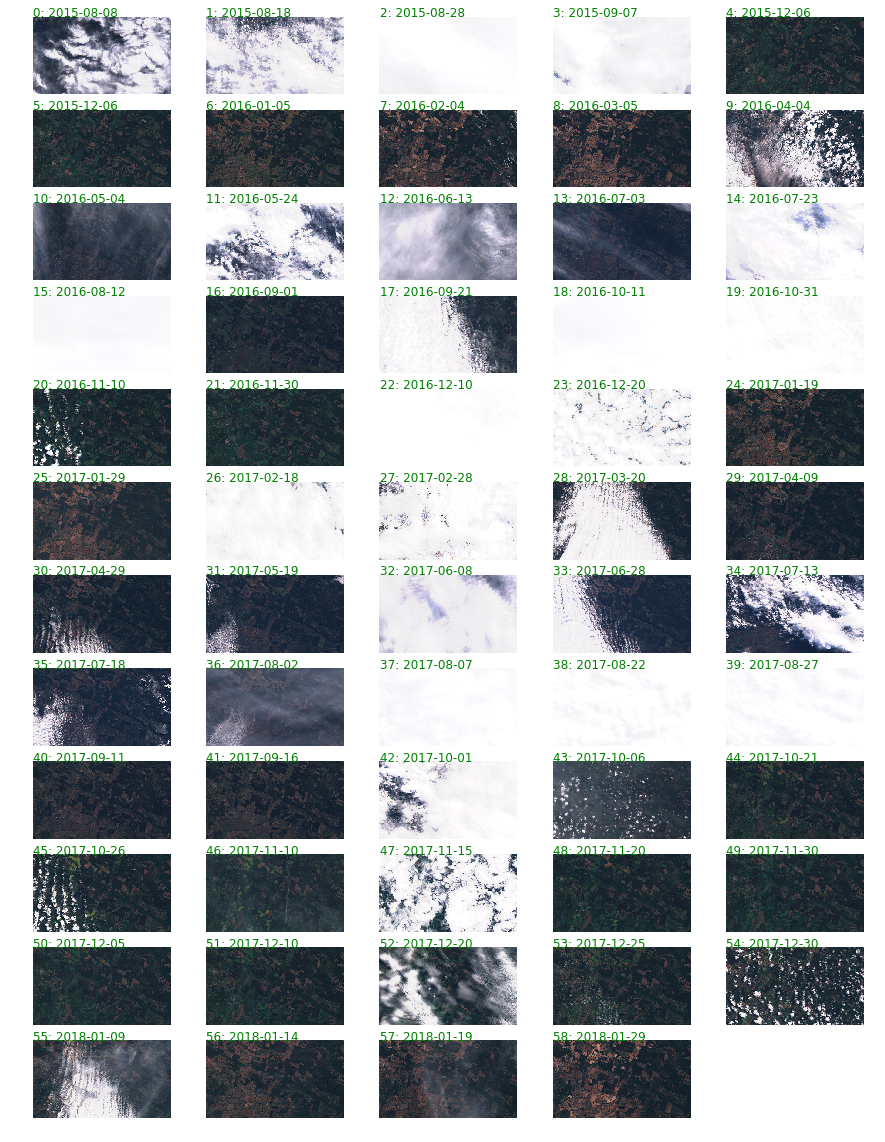

In [4]:
# create preview
chile_timelapse.get_previews()
chile_timelapse.plot_preview(filename='previews.pdf')

In [5]:
# if set correctly, download full res
chile_timelapse.save_fullres_images()

In [6]:
# if image is on the border of tile, and this area is greater than 1%, discard
chile_timelapse.mask_invalid_images(max_invalid_coverage=0.01)

INFO:time_lapse:Downloading cloud data and running cloud detection. This may take a while.


DownloadFailedException: Failed to download from:
https://services.sentinel-hub.com/ogc/wcs/3a4d845f-48a2-42dd-b596-5f1be96cb985?SERVICE=wcs&MAXCC=100.0&EvalScript=cmV0dXJuIFtCMDEsQjAyLEIwNCxCMDUsQjA4LEI4QSxCMDksQjEwLEIxMSxCMTJd&ShowLogo=False&Transparent=True&AtmFilter=NONE&BBOX=-38.2%2C-72.4%2C-38.0%2C-72.0&FORMAT=image%2Ftiff%3Bdepth%3D32f&CRS=EPSG%3A4326&TIME=2016-10-11T14%3A49%3A22%2F2016-10-11T14%3A49%3A22&RESX=60m&RESY=60m&COVERAGE=TRUE_COLOR&REQUEST=GetCoverage&VERSION=1.1.2
with HTTPError:
500 Server Error: Internal Server Error for url: https://services.sentinel-hub.com/ogc/wcs/3a4d845f-48a2-42dd-b596-5f1be96cb985?SERVICE=wcs&MAXCC=100.0&EvalScript=cmV0dXJuIFtCMDEsQjAyLEIwNCxCMDUsQjA4LEI4QSxCMDksQjEwLEIxMSxCMTJd&ShowLogo=False&Transparent=True&AtmFilter=NONE&BBOX=-38.2%2C-72.4%2C-38.0%2C-72.0&FORMAT=image%2Ftiff%3Bdepth%3D32f&CRS=EPSG%3A4326&TIME=2016-10-11T14%3A49%3A22%2F2016-10-11T14%3A49%3A22&RESX=60m&RESY=60m&COVERAGE=TRUE_COLOR&REQUEST=GetCoverage&VERSION=1.1.2
Server response: "Out of retries"